#Основы математической статистики и её применение в анализе данных

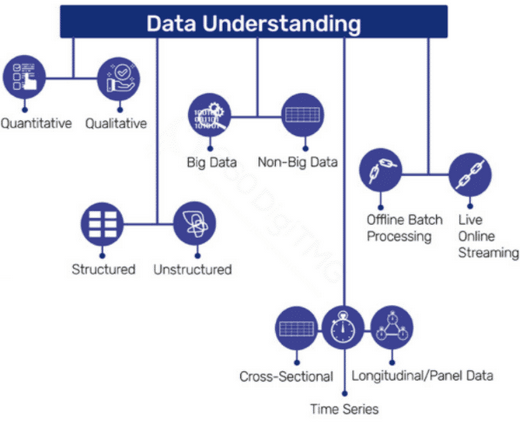

Продолжим работать в рамках подхода CRISP-DM, а именно **Data Understanding** и **Data Preparation**.

На этом занятии мы изучим способы, позволяющие понять структуру данных, получить первичную диагностическую статистику, очистить явные проблемы (пропуски и выбросы), построить ключевые распределения, оценить зависимость между переменными и подготовить данные для последующего моделирования.

##Основные понятия теории вероятностей и математической статистики

**Случайная переменная** — величина, которая может принимать различные взаимоисключающие значения с некоторой вероятностью. Случайная переменная может быть дискретной (например, значение на кубике) или непрерывной (например, рост человека).

random-variable-1.svg

**Выборка** — набор наблюдений одной случайной величины, полученных в результате повторных экспериментов или измерений.

Обозначим выборку как $X = \{x_1, x_2, \dots, x_N\}$ из $N$ наблюдений.

**Популяция** (генеральная совокупность) — множество всех возможных наблюдений интересующего явления; выборка — частичный набор из популяции.

**Оценка** (estimator) — правило или формула для оценки параметра популяции.

##Базовые статистики

Предположим, нам доступен `DataFrame` с данными.

In [2]:
import pandas as pd

df = pd.DataFrame({'x':[6, 2, 4, 8, 5, 7, 1, 4, 6, 10, 3, 7, 3, 6, 5, 8, 5, 6, 9]})

###Минимум и максимум

Выведем **минимальное** и **максимальное** значения набора данных:

In [3]:
df['x'].min(), df['x'].max()

(1, 10)

###Мат. ожидание

**Математическое ожидание** случайной величины $X$ с вероятностями $p_i$ :

$$E(X)=p_1 x_1 + p_2 x_2 + \dots = \sum_i p_i x_i$$

Например, для **игрального кубика** возможные значения $x_i$ — это 1, 2, 3, 4, 5 и 6, а вероятности $p_i$ равны $\frac{1}{6}$ для каждого значения. Тогда математическое ожидание:

$$E(X) = \frac{1}{6} \cdot 1 + \frac{1}{6} \cdot 2 + \frac{1}{6} \cdot 3 + \frac{1}{6} \cdot 4 + \frac{1}{6} \cdot 5 + \frac{1}{6} \cdot 6 = 3.5$$

Статистика даёт дробный результат, хотя в реальной жизни такое невозможно.

###Выборочное среднее


Для выборки $X=\{x_1,\dots,x_N\}$ **выборочное среднее** (оценка мат. ожидания) записывается как:

$$\bar{x}=\frac{x_1 + x_2 + \dots + x_N}{N} = \frac{1}{N}\sum_{i=1}^N x_i$$

Выведем выборочное среднее через `pandas` в небольшой таблице с одним столбцом под даные:

In [4]:
df['x'].mean()

np.float64(5.526315789473684)

###Мода

**Мода** — значение, наиболее часто встречающееся в выборке.

In [5]:
df['x'].mode()

,x
0,6


###Медиана

**Медиана** — центральное значение выборки, делящее её пополам. Для нечётного $N$ это средний элемент, для чётного — среднее двух средних элементов.

In [6]:
df['x'].median()

6.0

###Визуализация

Соберём статистики воедино. Для дальнейшей визуализации укажем цвета линий.

In [7]:
stats = {
    'mean': (df['x'].mean(), 'r'),
    'mode': (df['x'].mode()[0], 'b'),
    'min': (df['x'].min(), 'g'),
    'max': (df['x'].max(), 'y'),
    'median': (df['x'].median(), 'orange')
}

Визуализируем результат с использованием `sns.histplot()`.

Для приближения зависимости непрерывной кривой используем метод сглаживания **KDE** (Kernel Density Estimation).

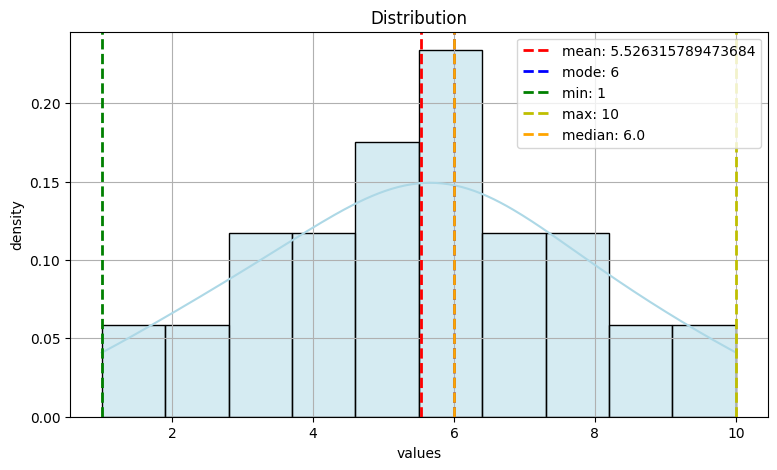

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(9, 5))
sns.histplot(df['x'], bins=10, kde=True, color='lightblue', stat='density')

for key, (value, c) in stats.items():
    plt.axvline(value, linestyle='dashed', linewidth=2, label=f'{key}: {value}', color=c)

plt.title('Distribution')
plt.xlabel('values')
plt.ylabel('density')
plt.legend()
plt.grid()
plt.show()


###Сравнение статистик на примере данных о зарплатах в РФ за 2019 год

К выбору статистики следует подходить с осторожностью, так как каждая из них несёт разную информацию.


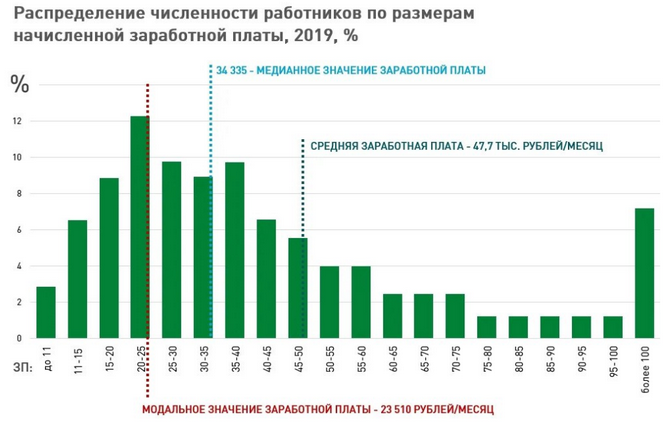

**Среднее** неустойчиво по отношению к выбросам. Несколько слишком больших или маленьких значений вызывают его перевес в ту или иную сторону, так что среднее становится неинформативным.

По иллюстрации видно, что **мода** и **среднее** различаются могут различаться в разы и описывают одни и те же данные с разных сторон. Наиболее устойчива **медиана**.

##Распределения случайной величины

**Дискретная случайная величина** — это случайная величина, принимающая конечное или счетное множество значений

**Непрерывная случайная величина** — это случайная величина, которая может принимать любое значение в заданном интервале.

**Распределение** описывает, как именно значения случайной величины вероятностно распределены. Эмпирическое распределение строят из выборки, теоретическое — задают формулой.

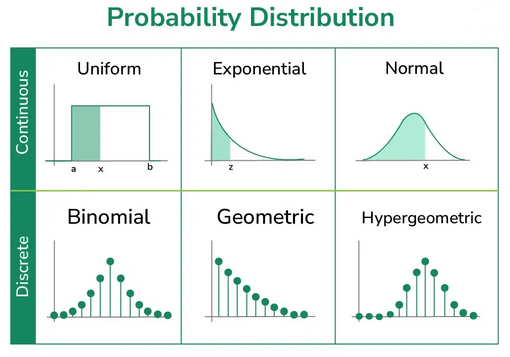

###Равномерное распределение

**Равномерное распределение** описывает случайную величину, которая принимает значения в заданном интервале с одинаковой вероятностью. Для непрерывной случайной величины $X$, равномерно распределенной на интервале $[a, b]$, **функция плотности вероятности** задается следующим образом:

$$f(x) =  \begin{cases}  \frac{1}{b - a} & \text{если } a \leq x \leq b \\  0 & \text{иначе} \end{cases}$$

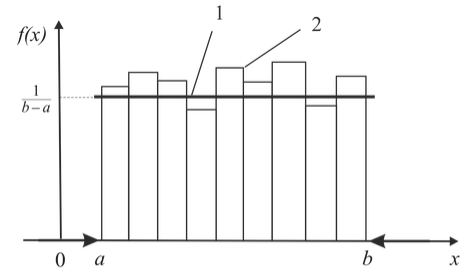


Для равномерного распределения **математическое ожидание** рассчитывается по формуле:

$$E(X) = \frac{a + b}{2}$$

###Биномиальное распределение

**Биномиальное распределение** — дискретное распределение, которое описывает количество успехов в фиксированном числе независимых испытаний, где каждое испытание имеет два возможных результата: "успех" или "неудача".

Параметры биномиального распределения:
- $ n $: количество испытаний
- $ p $: вероятность успеха в каждом испытании

Функция вероятности $ P(X = k) $ для биномиальной случайной величины $ X $ с параметрами $ n $ и $ p $ задается следующим образом:

$$P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k} = \frac{n!}{k!(n-k)!}p^k (1 - p)^{n - k} $$

**Математическое ожидание $ E(X) $**:

Математическое ожидание биномиального распределения вычисляется по формуле:

$$E(X) = n \cdot p$$


###Пример. Стрелок и мишень

Вспомним **классическую школьную задачу** и визуализируем её результат. Стрелок практикуется в стрельбе по мишени. Вероятность попадания в цель составляет $ p = 0.3 $. Стрелок делает $ n = 20 $ выстрелов. Визуализируем решение.


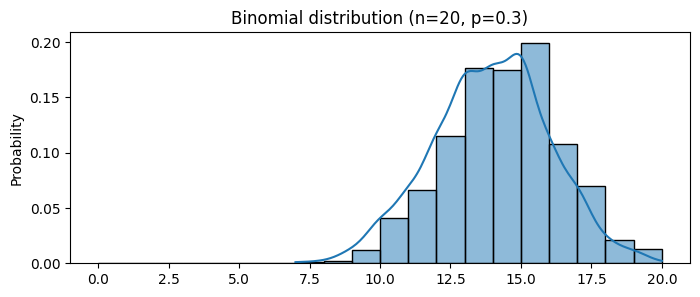

In [14]:
import seaborn as sns
import numpy as np


n, p = 20, 0.7
data_binom = np.random.binomial(n, p, 1000)
plt.figure(figsize=(8,3))
sns.histplot(data_binom, bins=range(n+1), kde=True, stat='probability')
plt.title('Binomial distribution (n=20, p=0.3)')
plt.show()

###Нормальное (гауссовское) распределение

**Нормальное распределение**, также известное как гауссово распределение, является непрерывным распределением, характеризующимся колоколообразной формой. Оно определяется функцией плотности распределения:

$$f(x)=\frac{1}{\sigma\sqrt{2\pi}} \exp\left(-\frac{(x-\bar{x})^2}{2\sigma^2}\right),$$

где $\bar{x}$ — математическое ожидание (сдвиг), $\sigma^2$ — дисперсия, $\sigma$ — стандартное отклонение.

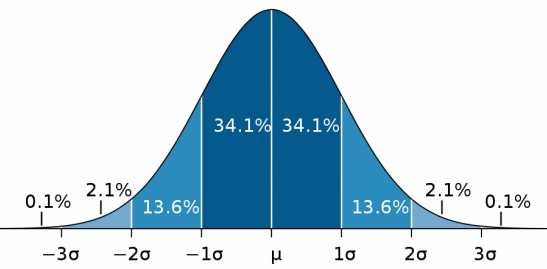

**Дисперсия** случайной величины $ X $ — измерение разброса значений относительно математического ожидания и определяется как:

$$D(X) = E[(X - \bar{x})^2] = \sum_{i=1}^{n} \frac{(x_i - \bar{x})^2}{n} = \sigma^2,$$

**Выборочная дисперсия** (несмещённая оценка) вычисляется как:

$$s^2=\frac{1}{N-1}\sum_{i=1}^N (x_i-\bar{x})^2$$

**Стандартное отклонение** $ \sigma $ — квадратный корень из дисперсии. Служит для измерения разброса значений. Оно определяется как:

$$\sigma = \sqrt{D(X)}.$$

Стандартное отклонение показывает, насколько значения случайной величины отклоняются от среднего, и используется для стандартизации данных. Для выборочной дисперсии стандартное отклонение равно $ s $.

###Правило 68–95–99.7

Для **нормального распределения** приблизительно:
- 68% наблюдений лежит в $[\bar{x}-\sigma,\bar{x}+\sigma]$. Экспериментальные данные, отклоняющиеся от среднего не более чем на сигму, используют для сравнения с известными табличными.
- 95% в $[\bar{x}-2\sigma,\bar{x}+2\sigma]$,
- 99.7% в $[\bar{x}-3\sigma,\bar{x}+3\sigma]$. Большая часть физических приборов даёт показания, попадающие в $3\sigma$.

###5 сигм и CERN

**Пять сигм** — известный уровень значимости в физике элементарных частиц. Такой высокий критерий позволяет отличать шумовые отклонения относительно имеющихся законов и принципиально новые законы.

Открытие **бозона Хиггса в CERN** требовало сбора статистики около $5\sigma$. Вероятность отклонения от гипотезы, подтверждённой данными на такой статистике, составляет:

$$P = 1 - \alpha = 0.000000287$$

Интервал, в который с заданной вероятностью должно попадать новое значение случайной величины, называют **доверительным интервалом**. А вероятность — **доверительной вероятностью** $\alpha$.

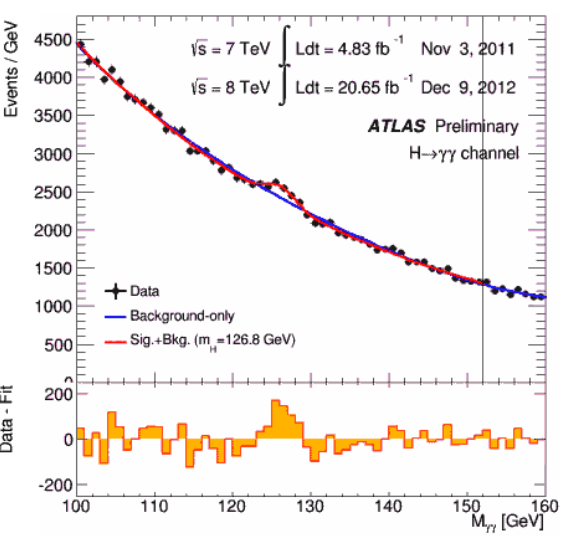

###Квартильная статистика. Очистка данных от выбросов

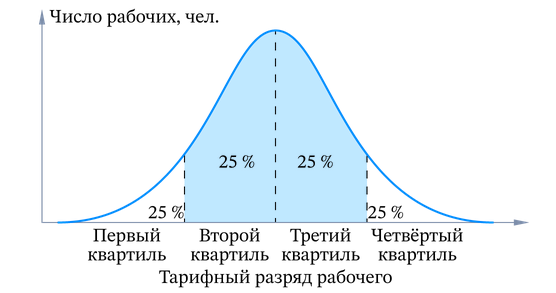

**Квартили** — это значения, которые делят набор данных на четыре равные части. Основные квартили:

- **Первый квартиль (Q1)** — это значение, ниже которого находится 25% данных. Он представляет собой нижнюю границу первой четверти распределения.
  
- **Медиана (Q2)** — это значение, которое делит данные пополам. 50% наблюдений находятся ниже медианы, а 50% — выше.

- **Третий квартиль (Q3)** — это значение, ниже которого находится 75% данных. Он представляет собой верхнюю границу третьей четверти распределения.

**Межквартильный размах (IQR)** измеряет разброс данных между первым и третьим квартилями и вычисляется по формуле:

$$IQR = Q3 - Q1.$$

Часто используется правило для **определения выбросов** в данных. Выбросами считаются значения, которые выходят за пределы:

$$outlier < Q1 - 1.5 \cdot IQR \quad or \quad > Q3 + 1.5 \cdot IQR.$$


Приведём пример с 1000 нормально распределенных значений

<Axes: >

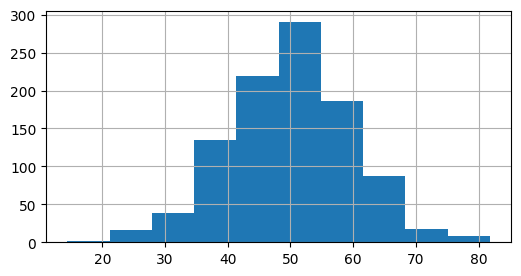

In [15]:
series = pd.Series(np.random.normal(50, 10, 1000))
series.hist(figsize=(6, 3))

Для визуализации выбросов часто используют график `boxplot`.

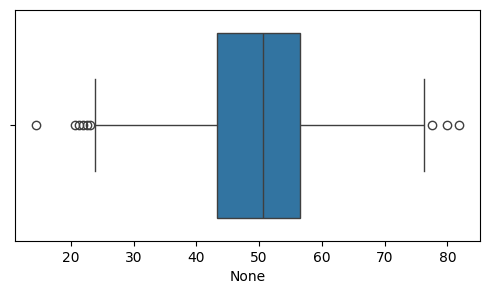

In [16]:
plt.figure(figsize=(6,3))
sns.boxplot(x=series)
plt.show()

Очистим данные от выбросов с помощью межквартильного размаха.

<Axes: >

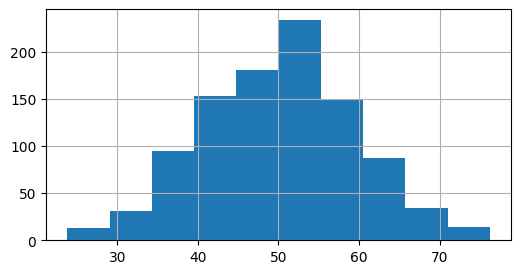

In [18]:
Q1 = series.quantile(0.25)
Q3 = series.quantile(0.75)
IQR = Q3 - Q1
low, high = Q1 - 1.5*IQR, Q3 + 1.5*IQR
cleaned = series[(series >= low) & (series <= high)]
cleaned.hist(figsize=(6, 3))


##Пример. Датасет с данными о глобальных катастрофах (2018–2024)

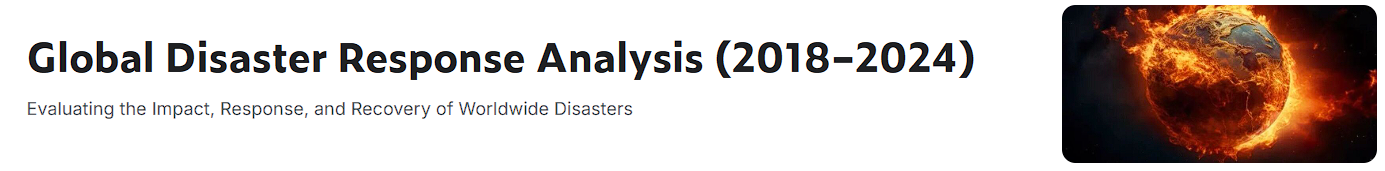

[Датасет](https://www.kaggle.com/datasets/zubairdhuddi/global-daset) Kaggle охватывает 50 тыс. глобальных катастрофических событий, зарегистрированных с 2018 по 2024 год, включая типы катастроф, затронутые страны, степень тяжести и т. д.

Необходимо провести исследование и предобработку данных.

###Решение

Установим библиотеку для скачивания датасета

In [20]:
!pip install -q opendatasets

Сохраним токен Kaggle в необходимой для opendatasets директории.

In [21]:
from google.colab import files
import os

uploaded = files.upload()

Saving kaggle.json to kaggle.json


Скачаем датасет.

In [22]:
import opendatasets as od

url = 'https://www.kaggle.com/datasets/zubairdhuddi/global-daset'
od.download(url)

Dataset URL: https://www.kaggle.com/datasets/zubairdhuddi/global-daset


100%|██████████| 1.66M/1.66M [00:00<00:00, 1.37GB/s]

In [23]:
os.listdir('./global-daset')

['global_disaster_response_2018_2024 (1).csv']

In [24]:
df = pd.read_csv('./global-daset/global_disaster_response_2018_2024 (1).csv', parse_dates=['date'])

Исследуем данные.

In [25]:
df.head()

,date,country,disaster_type,severity_index,casualties,economic_loss_usd,response_time_hours,aid_amount_usd,response_efficiency_score,recovery_days,latitude,longitude
0,2021-01-31,Brazil,Earthquake,5.99,111,7934365.71,15.62,271603.79,83.21,67,-30.613,-122.557
1,2018-12-23,Brazil,Extreme Heat,6.53,100,8307648.99,5.03,265873.81,96.18,55,10.859,-159.194
2,2020-08-10,India,Hurricane,1.55,22,765136.99,32.54,49356.49,60.40,22,0.643,-160.978
3,2022-09-15,Indonesia,Extreme Heat,4.55,94,1308251.31,7.83,237512.88,86.41,47,-33.547,30.350
4,2022-09-28,United States,Wildfire,3.80,64,2655864.36,21.90,188910.69,72.81,42,-19.170,-117.137


Для первичного анализа используют методы `.info` и `.describe`. Они автоматически выводят информацию о пропусках и основных статистиках в числовых колонках.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       50000 non-null  datetime64[ns]
 1   country                    50000 non-null  object        
 2   disaster_type              50000 non-null  object        
 3   severity_index             50000 non-null  float64       
 4   casualties                 50000 non-null  int64         
 5   economic_loss_usd          50000 non-null  float64       
 6   response_time_hours        50000 non-null  float64       
 7   aid_amount_usd             50000 non-null  float64       
 8   response_efficiency_score  50000 non-null  float64       
 9   recovery_days              50000 non-null  int64         
 10  latitude                   50000 non-null  float64       
 11  longitude                  50000 non-null  float64       
dtypes: d

In [29]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
date,50000,2021-07-02 13:05:39.840000,2018-01-01 00:00:00,2019-10-07 00:00:00,2021-06-27 00:00:00,2023-04-02 00:00:00,2024-12-31 00:00:00,NaN
severity_index,50000.0,5.015769,1.0,3.66,4.99,6.34,10.0,1.942843
casualties,50000.0,100.59114,0.0,51.0,91.0,138.0,524.0,65.052064
economic_loss_usd,50000.0,5068593.448265,527.39,2585513.4775,4548350.735,6950614.605,24456237.87,3268540.520971
response_time_hours,50000.0,12.183027,1.0,6.27,10.51,15.45,63.1,9.259081
aid_amount_usd,50000.0,250000.329129,16.6,142966.335,230536.47,335225.93,1126465.23,143227.514276
response_efficiency_score,50000.0,87.574025,29.75,83.06,89.18,94.7,100.0,10.188961
recovery_days,50000.0,49.68256,2.0,36.0,49.0,63.0,112.0,20.098944
latitude,50000.0,0.231205,-59.994,-29.84825,0.2675,30.48825,59.997,34.759662
longitude,50000.0,0.089889,-169.998,-85.55175,0.3905,85.665,169.999,98.380208


Выведем распределение `economic_loss_usd`.

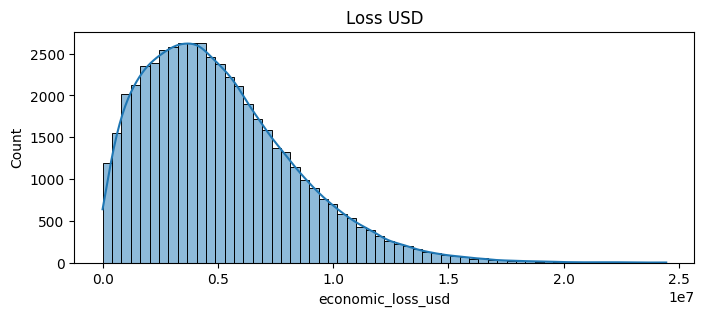

In [30]:
plt.figure(figsize=(8,3))
sns.histplot(df['economic_loss_usd'].dropna(), bins=60, kde=True)
plt.title('Loss USD')
plt.show()

Построим `boxplot`.

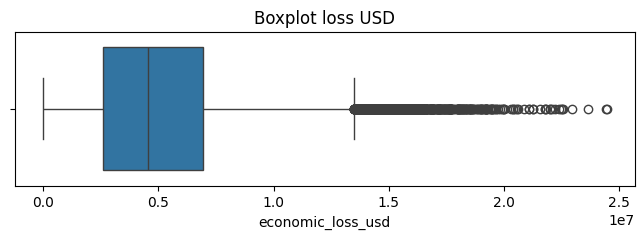

In [31]:
plt.figure(figsize=(8,2))
sns.boxplot(x=df['economic_loss_usd'].dropna())
plt.title('Boxplot loss USD')
plt.show()


Очистим выбросы по IQR и сравним:

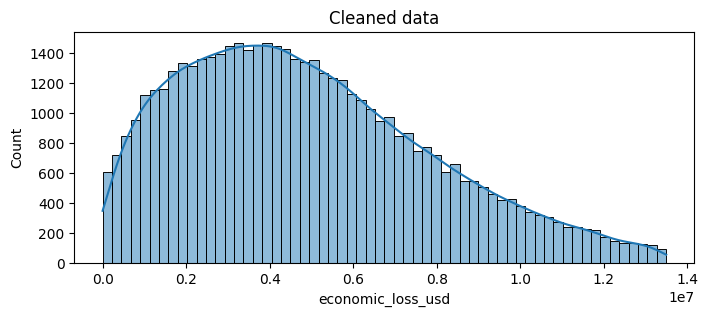

In [32]:
ser = df['economic_loss_usd']

Q1 = ser.quantile(0.25)
Q3 = ser.quantile(0.75)

IQR = Q3 - Q1
low = Q1 - 1.5*IQR
high = Q3 + 1.5*IQR

df_clean = df[(df['economic_loss_usd'].isna()) | ((df['economic_loss_usd'] >= low) & (df['economic_loss_usd'] <= high))]
plt.figure(figsize=(8,3))
sns.histplot(df_clean['economic_loss_usd'].dropna(), bins=60, kde=True)
plt.title('Cleaned data')
plt.show()


##Оценка зависимости между случайными величинами

###Ковариация

**Ковариация** — это мера того, как два случайных процесса соотносятся друг с другом. Она показывает направление связи между переменными $ X $ и $ Y $. Формула для вычисления ковариации выглядит следующим образом:

$$\mathrm{cov}(X,Y)=\frac{1}{N-1}\sum_{i=1}^N (x_i-\bar{x})(y_i-\bar{y}),$$

где $ N $ — общее число наблюдений, $ x_i $ и $ y_i $ — значения переменных, а $ \bar{x} $ и $ \bar{y} $ — средние значения этих переменных.

- **Положительная** ковариация указывает на тенденцию $ X $ и $ Y $ имеют увеличиваться или уменьшаться вместе.
- **Отрицательная** — одна переменная увеличивается, когда другая уменьшается.
- **Нулевая** ковариация указывает на отсутствие линейной зависимости.

###Корреляция

Ковариация — величина без масштаба, поэтому она малоинформативна. Поэтому вводят понятие корреляции.

**Корреляция Пирсона** определяется как отношение ковариации к произведению стандартных отклонений двух переменных. Формула для корреляции Пирсона имеет следующий вид:

$$corr_{X,Y}=\frac{\mathrm{cov}(X,Y)}{\sigma_X \sigma_Y},$$

где $ \sigma_X $ и $ \sigma_Y $ — стандартные отклонения переменных $ X $ и $ Y $ соответственно.

**Корреляция** принимает значения в диапазоне от $-1$ до $1$:
- 1 указывает на идеальную положительную линейную связь,
- -1 — на идеальную отрицательную линейную связь,
- 0 — на отсутствие линейной зависимости.

###Нулевая корреляция при наличии связи

Примером **неинформативности** корреляции является отношение между переменной $ x $ и $ y = x^2 $. Код для вычисления ковариации и корреляции:

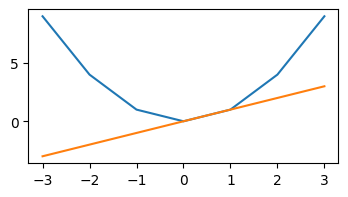

In [34]:
import numpy as np

x = np.array([-3, -2, -1, 0, 1, 2, 3])
y = x ** 2

cov_xy = np.cov(x, y)
correlation = np.corrcoef(x, y)

plt.figure(figsize=(4, 2))
plt.plot(x, y)
plt.plot(x, x)
plt.show()

In [35]:
cov_xy

array([[ 4.66666667,  0.        ],
       [ 0.        , 14.        ]])

In [36]:
correlation

array([[1., 0.],
       [0., 1.]])

Корреляция равна нулю, то есть не понимает, что связь между $x$ и $y$ явная. Связано это с тем, что корреляция показывает только линейную связь. В нашем случае квадратичная.

###Ложная корреляция

Важно уметь интерпретировать исследуемые данные. Часто связь между ними есть только с точки зрения математической статистики. С учётом здравого смысла эта связь может оказаться ложной. В таких случаях говорят о **ложной корреляции**.

Ниже приводится пример явной связи между количеством фильмов с Расселом Кроу и удовлетворенностью клиентов аптечной компании Walgreens.

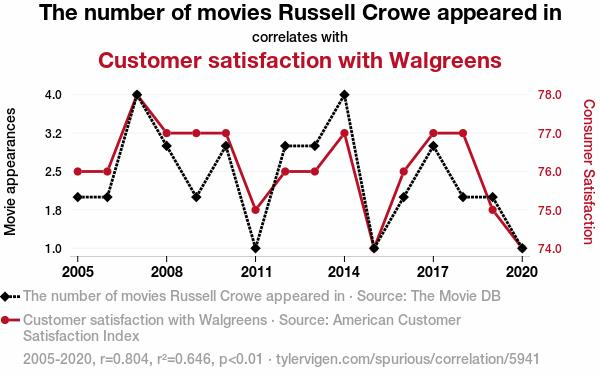

##Пример. Датасет с данными о лучших универститетах мира (2025)

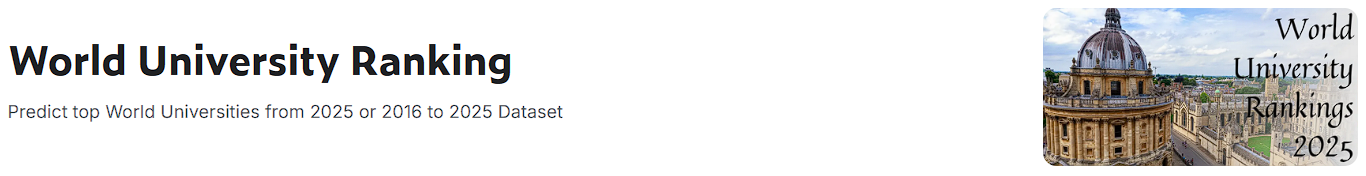

[Датасет](https://www.kaggle.com/datasets/aritra100/world-university-ranking?select=World+University+Rankings.csv) Kaggle содержит данные о 2.7 тыс. лучших университетов мира. Приведены данные о качестве образования, исследовательской деятельности, цитируемости и т. д.

Необходимо провести исследование данных.

###Решение

Скачаем датасет.

In [37]:
import opendatasets as od

url = 'https://www.kaggle.com/datasets/aritra100/world-university-ranking'
od.download(url)

Dataset URL: https://www.kaggle.com/datasets/aritra100/world-university-ranking


100%|██████████| 899k/899k [00:00<00:00, 1.25GB/s]

In [38]:
os.listdir('./world-university-ranking')

['2011_2015_rankings.csv',
 'WUR_2016_to_2025.csv',
 'World University Rankings.csv']

Нам нужен только последний файл, в нём данные по 2025 году.

In [39]:
df = pd.read_csv('./world-university-ranking/World University Rankings.csv')

In [40]:
df.head()

,name,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,record_type,member_level,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,subjects_offered,closed,unaccredited,overall_score
0,University of Oxford,96.6,100.0,99.0,98.7,97.5,master_account,0,United Kingdom,"21,750",10.9,42%,49:51:00,"Geography,Chemistry,Chemical Engineering,Biolo...",False,False,98.5
1,Stanford University,99.0,97.8,99.6,100.0,87.0,private,0,United States,"14,517",6.4,23%,47:53:00,"Computer Science,Communication & Media Studies...",False,False,98
2,Massachusetts Institute of Technology,98.6,96.2,99.7,100.0,93.8,private,0,United States,"11,085",8.0,33%,41:59:00,"Architecture,Economics & Econometrics,Archaeol...",False,False,97.9
3,Harvard University,97.7,99.9,99.4,84.2,90.8,private,0,United States,"20,050",9.0,25%,51:49:00,"Sociology,Architecture,Physics & Astronomy,Psy...",False,False,97.8
4,University of Cambridge,95.8,100.0,98.0,87.9,97.4,master_account,0,United Kingdom,"20,565",11.5,38%,48:52:00,Politics & International Studies (incl Develop...,False,False,97.5


Найдём МИФИ.

In [41]:
df[df['name'].str.contains('MEPhI')]

,name,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,record_type,member_level,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,subjects_offered,closed,unaccredited,overall_score
457,National Research Nuclear University MEPhI,53.1,41.0,42.4,57.5,78.8,master_account,0,Russian Federation,"4,993",9.2,28%,39 : 61,"Mechanical & Aerospace Engineering,Computer Sc...",False,False,45.4–49.0


Исследуем данные.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2673 entries, 0 to 2672
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          2673 non-null   object 
 1   scores_teaching               1904 non-null   float64
 2   scores_research               1904 non-null   float64
 3   scores_citations              1904 non-null   float64
 4   scores_industry_income        1904 non-null   float64
 5   scores_international_outlook  1904 non-null   float64
 6   record_type                   2673 non-null   object 
 7   member_level                  2673 non-null   int64  
 8   location                      2673 non-null   object 
 9   stats_number_students         2673 non-null   object 
 10  stats_student_staff_ratio     2673 non-null   float64
 11  stats_pc_intl_students        2673 non-null   object 
 12  stats_female_male_ratio       2580 non-null   object 
 13  sub

In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
scores_teaching,1904.0,29.060662,13.967201,9.4,19.400,25.80,34.500,99.0
scores_research,1904.0,23.416176,16.697923,4.6,11.800,17.25,29.900,100.0
scores_citations,1904.0,52.189706,25.071342,3.4,30.400,52.40,73.225,99.7
scores_industry_income,1904.0,47.057405,26.150454,15.6,22.275,41.05,68.200,100.0
scores_international_outlook,1904.0,49.907143,21.828249,16.1,31.975,45.30,65.400,98.8
member_level,2673.0,0.550318,2.231166,0.0,0.000,0.00,0.000,11.0
stats_student_staff_ratio,2673.0,19.130527,13.450010,0.3,12.300,16.60,22.500,333.3


Отберём только числовые колонки.

In [44]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_cols

Index(['scores_teaching', 'scores_research', 'scores_citations',
       'scores_industry_income', 'scores_international_outlook',
       'member_level', 'stats_student_staff_ratio'],
      dtype='object')

Построим **коррелограмму**.

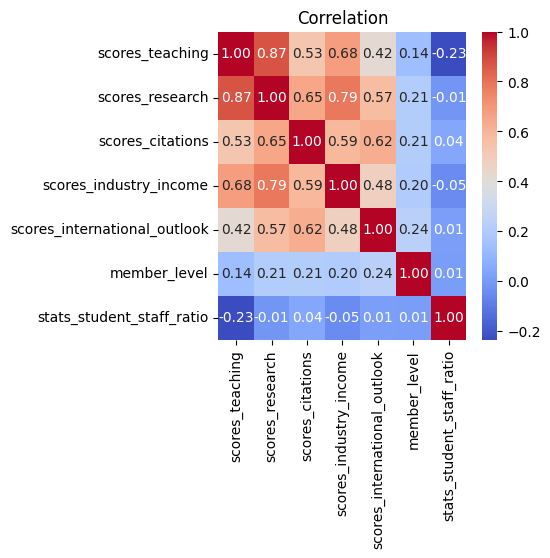

In [46]:
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(4, 4))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation')
plt.show()


Построим график парных зависимостей для ключевых метрик

<Figure size 500x500 with 0 Axes>

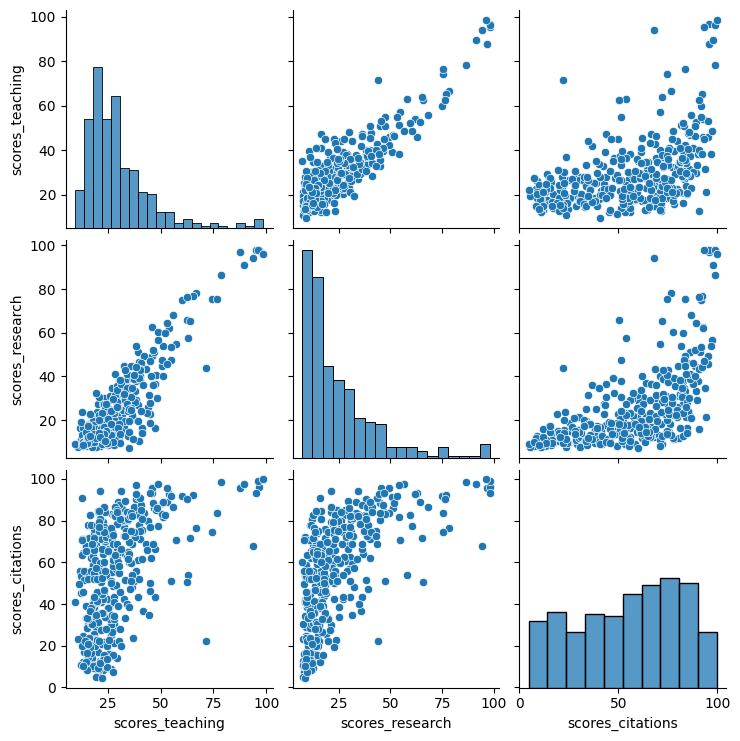

In [47]:
plt.figure(figsize=(5, 5))
cols = ['scores_teaching','scores_research','scores_citations','overall_score']
sns.pairplot(df[cols].sample(500))
plt.show()

Построим распределения для всех числовых колонок.

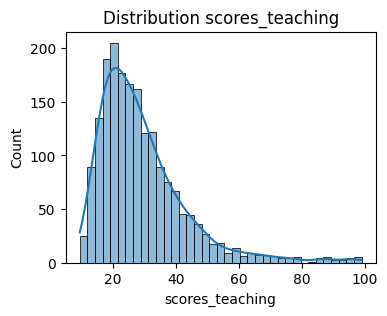

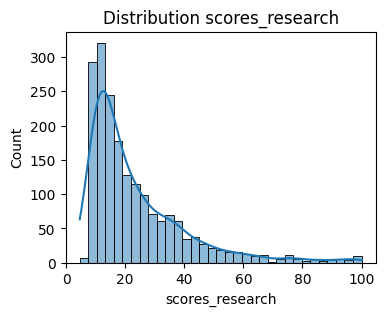

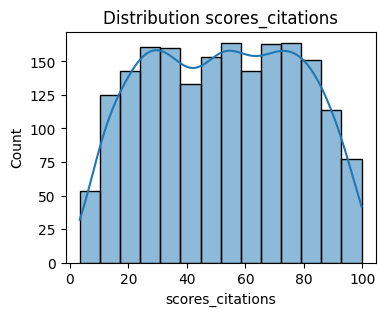

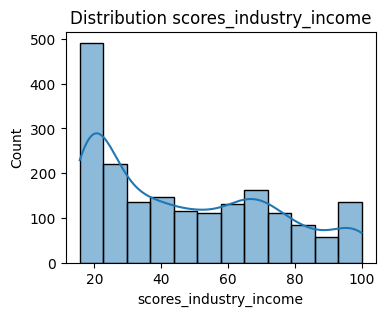

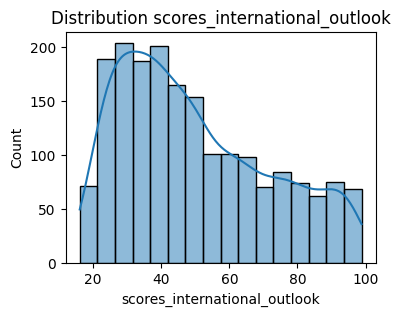

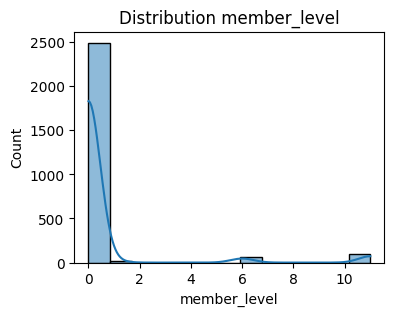

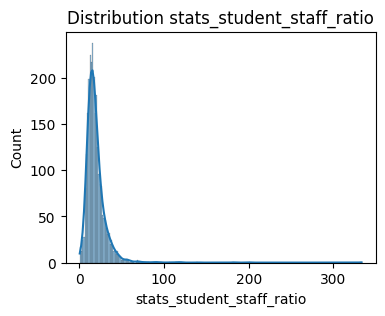

In [48]:
for col in numeric_cols:
    plt.figure(figsize=(4,3))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution {col}')
    plt.show()


Графики имеют вид нормального распределения со сдвигом верхней точки купола. Исследуем выбросы.

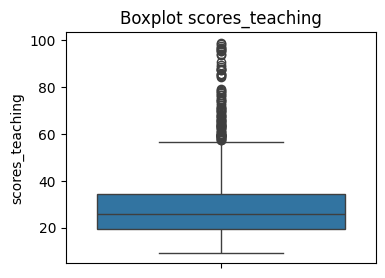

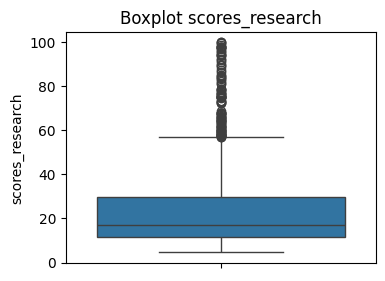

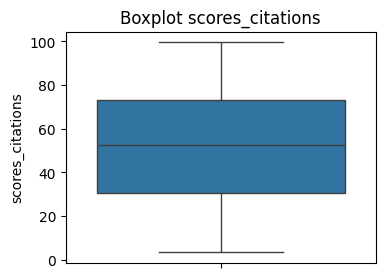

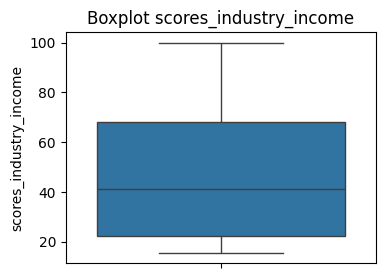

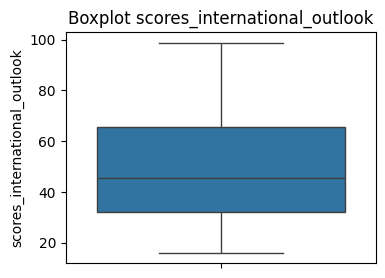

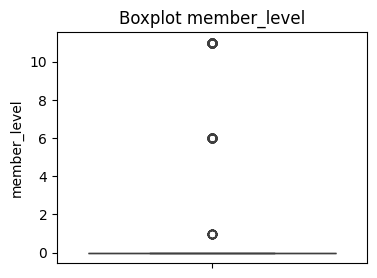

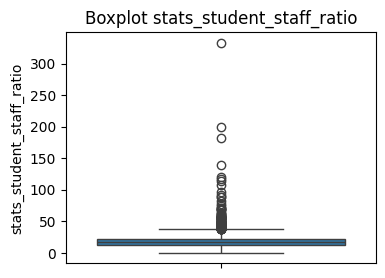

In [49]:
for col in numeric_cols:
    plt.figure(figsize=(4,3))
    sns.boxplot(df[col].dropna())
    plt.title(f'Boxplot {col}')
    plt.show()


`member level` состоит из нулей и немногочисленных выбросов. Удалим этот столбец.

In [ ]:
df.drop(columns='member_level', inplace=True)

#Выводы

В ходе данного занятия мы:

1. Познакомились с основными понятиями теории вероятностей и математической статистики.
2. Рассмотрели основные распределения.
3. Изучили квартильную статистику и правила обработки выбросов.
4. Провели исследование и предобработку данных о глобальных катастрофах (2018–2024).
5. Изучили способы оценки попарной зависимости случайных величин.
6. Исследовали зависимости между основными оценками в международном рейтинге вузов за 2025 год.


##Данные об авторе

Зюков Алексей Алексеевич,

лаборант отдела-онлайн образования НИЯУ МИФИ,

бакалавр кафедры суперкомпьютерных технологий в инженерно-физическом моделировании НИЯУ МИФИ.

##Список использованной и рекомендованной литературы

1. Егоров, А. Д. Репозитории с лекциями по анализу данных в НИЯУ МИФИ. – Текст : электронный / А. Д. Егоров // GitHub : [сайт]. – URL: https://github.com/ShadarRim (дата обращения: 01.11.2025).
2. Малов, Д. А. Глубокое обучение и анализ данных : практическое руководство. / Д. А. Малов. – Текст : непосредственный. – Санкт-Петербург : БХВ-Петербург, 2023. – 272 с. : ил. – ISBN 978-5-9775-1172-8.
3. Five Sigma // CERN : [сайт]. – 2024. – URL: home.cern (дата обращения: 01.11.2025). – Текст : электронный.